In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/DESCO.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)    VOLUME
0  439 2018-05-08        DESCO  40.0  ...  40.8    280       7.465  181313.0
1  438 2018-06-08        DESCO  39.9  ...  40.2    131       3.175   79286.0
2  437 2018-07-08        DESCO  40.0  ...  40.0    182      11.427  284763.0
3  436 2018-08-08        DESCO  39.9  ...  40.0    161      11.144  277230.0
4  435 2018-09-08        DESCO  40.2  ...  40.0     99       2.922   73105.0

[5 rows x 12 columns]

In [2]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)    VOLUME
36  403 2018-01-10        DESCO  43.8  ...  43.8     75       1.989   45311.0
59  380 2018-01-11        DESCO  39.9  ...  41.0    340      14.165  352939.0
37  402 2018-02-10        DESCO  43.4  ...  43.9     28       1.045   23861.0
79  360 2018-02-12        DESCO  40.2  ...  39.9    138       4.990  124690.0
16  423 2018-03-09        DESCO  42.0  ...  41.2    253       4.630  109806.0

[5 rows x 12 columns]

In [3]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE  LTP*  HIGH  ...   YCP  TRADE  VALUE (mn)    VOLUME
DATE                                      ...                                   
2018-01-10  403        DESCO  43.8  44.5  ...  43.8     75       1.989   45311.0
2018-01-11  380        DESCO  39.9  41.0  ...  41.0    340      14.165  352939.0
2018-02-10  402        DESCO  43.4  44.0  ...  43.9     28       1.045   23861.0

[3 rows x 11 columns]

In [4]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [5]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [6]:
# Calculate daily std of returns
#df['volatility']= df['daily_ret'].rolling(window=2).std()
#f['volatility'] = df['volatility'].fillna(0.0)


In [7]:
df['volatility'] = df['volatility']*100

In [ ]:
df.head(50)

# TRADING CODE  LTP*  ...    VOLUME  daily_ret  volatility
DATE                                ...                                 
2018-01-10  403        DESCO  43.8  ...   45311.0   0.000000    0.000000
2018-01-11  380        DESCO  39.9  ...  352939.0  -0.088838    0.000000
2018-02-10  402        DESCO  43.4  ...   23861.0   0.097500    0.000000
2018-02-12  360        DESCO  40.2  ...  124690.0  -0.088838    0.000000
2018-03-09  423        DESCO  42.0  ...  109806.0   0.050000    0.000000
2018-03-10  401        DESCO  43.2  ...   98526.0   0.033333    0.000000
2018-03-12  359        DESCO  40.1  ...   93570.0  -0.076037    0.000000
2018-04-09  422        DESCO  41.4  ...   79783.0   0.032419    0.000000
2018-04-10  400        DESCO  43.6  ...   99443.0   0.060386    0.000000
2018-04-11  379        DESCO  42.8  ...  203300.0  -0.043280    0.000000
2018-04-12  358        DESCO  40.3  ...  169275.0  -0.038095    0.000000
2018-05-08  439        DESCO  40.0  ...  181313.0  -0.004950    0.000000
2018-05-09  421        DESCO  41.9  ...   87305.0   0.032338    0.000000
2018-05-11  378        DESCO  40.5  ...  125576.0  -0.019277    0.000000
2018-05-12  357        DESCO  40.7  ...  126673.0  -0.022113    0.000000
2018-06-08  438        DESCO  39.9  ...   79286.0   0.005025    0.000000
2018-06-09  420        DESCO  42.2  ...  236650.0   0.057500    0.000000
2018-06-11  377        DESCO  41.9  ...  219836.0  -0.009456    0.000000
2018-06-12  356        DESCO  40.5  ...   67227.0  -0.035800    0.000000
2018-07-08  437        DESCO  40.0  ...  284763.0  -0.009901    0.000000
2018-07-10  399        DESCO  43.6  ...   64209.0   0.097500    5.426871
2018-07-11  376        DESCO  42.2  ...  192205.0  -0.038724    5.497204
2018-08-08  436        DESCO  39.9  ...  277230.0  -0.052133    5.255115
2018-08-10  398        DESCO  43.3  ...   73513.0   0.090000    5.188598
2018-08-11  375        DESCO  42.4  ...  151136.0  -0.025229    4.810103
2018-08-13  433        DESCO  39.0  ...   43808.0  -0.082353    5.038583
2018-08-14  432        DESCO  40.6  ...   69007.0   0.043590    5.079680
2018-08-16  431        DESCO  40.4  ...  143961.0  -0.007371    4.790974
2018-08-19  430        DESCO  40.3  ...   37805.0  -0.002475    4.738352
2018-08-20  429        DESCO  40.9  ...   21126.0   0.012407    4.543112
2018-08-26  428        DESCO  40.9  ...    9635.0  -0.002451    4.446262
2018-08-27  427        DESCO  41.6  ...  134807.0   0.009828    4.366297
2018-08-28  426        DESCO  42.3  ...  464446.0   0.026764    4.396840
2018-08-29  425        DESCO  41.9  ...  336056.0  -0.004739    4.348252
2018-08-30  424        DESCO  41.2  ...  102946.0  -0.019048    4.347708
2018-09-08  435        DESCO  40.2  ...   73105.0  -0.031553    4.378083
2018-09-09  419        DESCO  44.0  ...  836891.0   0.100251    4.885410
2018-09-10  397        DESCO  42.0  ...  101693.0  -0.018223    4.760681
2018-09-12  355        DESCO  39.8  ...   63326.0  -0.078886    5.074573
2018-09-13  415        DESCO  43.9  ...  243520.0   0.113350    5.586386
2018-09-16  414        DESCO  43.9  ...  421708.0  -0.006787    5.582438
2018-09-17  413        DESCO  44.0  ...  117810.0   0.000000    5.172866
2018-09-18  412        DESCO  43.6  ...  291359.0  -0.004556    5.093985
2018-09-19  411        DESCO  44.0  ...  231972.0   0.009153    4.936194
2018-09-20  410        DESCO  43.5  ...  170269.0  -0.013605    4.555575
2018-09-23  409        DESCO  43.6  ...  194467.0   0.013793    4.523307
2018-09-24  408        DESCO  42.7  ...  216327.0  -0.022676    4.132720
2018-09-25  407        DESCO  43.5  ...  160355.0   0.025522    4.067888
2018-09-26  406        DESCO  44.4  ...   98069.0   0.000000    4.060125
2018-09-27  405        DESCO  43.5  ...   37815.0  -0.013575    4.077599

[50 rows x 13 columns]

In [8]:
import matplotlib.pyplot as plt 

In [9]:
df=df.reset_index()['volatility']

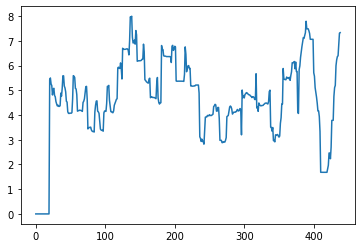

In [10]:
plt.plot(df)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df.shape

(439, 1)

In [12]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [ ]:

training_size,test_size

(307, 132)

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
from keras.optimizers import Adam

In [18]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 8s 386ms/step - loss: 0.2752 - val_loss: 0.2437
Epoch 2/100
7/7 [==============================] - 1s 141ms/step - loss: 0.0617 - val_loss: 0.0788
Epoch 3/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0300 - val_loss: 0.0925
Epoch 4/100
7/7 [==============================] - 1s 143ms/step - loss: 0.0135 - val_loss: 0.1056
Epoch 5/100
7/7 [==============================] - 1s 151ms/step - loss: 0.0130 - val_loss: 0.0819
Epoch 6/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0132 - val_loss: 0.0925
Epoch 7/100
7/7 [==============================] - 1s 148ms/step - loss: 0.0109 - val_loss: 0.0880
Epoch 8/100
7/7 [==============================] - 1s 144ms/step - loss: 0.0114 - val_loss: 0.0828
Epoch 9/100
7/7 [==============================] - 1s 148ms/step - loss: 0.0111 - val_loss: 0.0905
Epoch 10/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0099 - val_loss: 0.0805
Epoch 11/

In [21]:
from google.colab import drive

In [22]:
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
filepath = "/content/drive/MyDrive/stock price_LSTM/modelsDESCO/model.h5"
model.save(filepath)
from keras.models import load_model
f1 = '/content/drive/MyDrive/stock price_LSTM/modelsDESCO/model.h5'
model = load_model(f1)

In [24]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [25]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [27]:
Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

0.9895702988405473

In [28]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,test_predict)
print('MAE: %f' % mae)

MAE: 0.844220


In [ ]:
Y_test

array([[4.1638621 ],
       [3.93468193],
       [3.33340385],
       [1.68365192],
       [1.68237586],
       [1.68237586],
       [1.68237586],
       [1.68237586],
       [1.68237586],
       [1.68237586],
       [1.68237586],
       [1.68237586],
       [1.68237586],
       [1.81711736],
       [1.96645825],
       [2.46293795],
       [2.46293795],
       [2.23161447],
       [2.70056959],
       [3.78154271],
       [3.78597022],
       [3.78597022],
       [4.7498514 ],
       [5.10484531],
       [5.19681017],
       [5.99078812],
       [6.2309951 ],
       [6.36203243],
       [6.39463366],
       [6.87864634],
       [7.31196381]])

In [ ]:
test_predict

array([[4.4531455],
       [4.3197064],
       [4.1915846],
       [3.9462776],
       [3.3171165],
       [2.7186007],
       [2.338648 ],
       [2.1778471],
       [2.16449  ],
       [2.2219536],
       [2.2938218],
       [2.3478396],
       [2.3710425],
       [2.3633354],
       [2.3515956],
       [2.3525329],
       [2.4220908],
       [2.5056279],
       [2.5322583],
       [2.5756795],
       [2.7746015],
       [3.0303042],
       [3.257861 ],
       [3.5679197],
       [3.93573  ],
       [4.2821183],
       [4.68988  ],
       [5.1102204],
       [5.4796014],
       [5.7506704],
       [6.0261846]], dtype=float32)

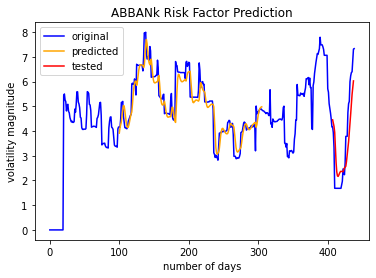

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [ ]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.83540696]
101
1 day input [0.41865486 0.43707088 0.37062697 0.37188426 0.36452444 0.40035555
 0.39745113 0.39965317 0.40182236 0.39423456 0.38847087 0.39407087
 0.45848533 0.48635468 0.55615661 0.5560904  0.73570287 0.68257175
 0.68050487 0.67923271 0.67905053 0.69231141 0.68759081 0.68946576
 0.68446707 0.69081708 0.67569486 0.70018759 0.7186249  0.76497398
 0.76491396 0.76579886 0.77092413 0.73429993 0.76844155 0.72068919
 0.72068472 0.51333664 0.50819697 0.7299009  0.74878433 0.79174579
 0.8209982  0.84684862 0.86960752 0.89207206 0.88810158 0.90268711
 0.91704915 0.97466638 0.93657381 0.9366007  0.936264   0.92648236
 0.91338362 0.88340663 0.88340663 0.88342779 0.88333386 0.88333386
 0.71394599 0.69687259 0.63870475 0.61415682 0.59065684 0.56007246
 0.52091982 0.52091982 0.49224824 0.41702537 0.21063321 0.21047357
 0.21047357 0.21047357 0.21047357 0.21047357 0.21047357 0.21047357
 0.21047357 0.21047357 0.2273304  0.24601369 0.30812576 0.30812576
 0.27918605 0.33785466 0.47308977

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

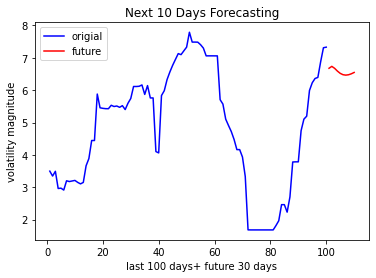

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting')
plt.legend(loc='best')
plt.show(block=False)

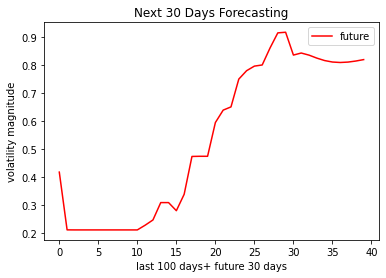

In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

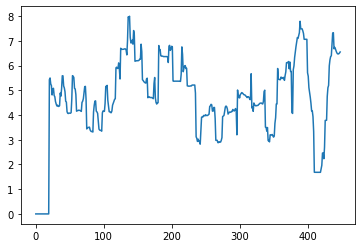

In [ ]:
plt.plot(df3)